In [1]:
print("Kernal is working!")

Kernal is working!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [5]:
df = pd.read_csv("spotify_2015_2025_85k.csv")
df.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


In [ ]:
# Spotify Music Analytics (2015-2025)
### Exploratory Data Analysis (EDA)

**Objective:** Explore trends in Spotify music features, genres, and popularity.


In [6]:
df.shape

(85000, 19)

In [7]:
df.columns

Index(['track_id', 'track_name', 'artist_name', 'album_name', 'release_date',
       'genre', 'duration_ms', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'instrumentalness', 'tempo', 'stream_count',
       'country', 'explicit', 'label'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          85000 non-null  object 
 1   track_name        84979 non-null  object 
 2   artist_name       85000 non-null  object 
 3   album_name        84954 non-null  object 
 4   release_date      85000 non-null  object 
 5   genre             85000 non-null  object 
 6   duration_ms       85000 non-null  int64  
 7   popularity        85000 non-null  int64  
 8   danceability      85000 non-null  float64
 9   energy            85000 non-null  float64
 10  key               85000 non-null  int64  
 11  loudness          85000 non-null  float64
 12  mode              85000 non-null  int64  
 13  instrumentalness  85000 non-null  float64
 14  tempo             85000 non-null  float64
 15  stream_count      85000 non-null  int64  
 16  country           85000 non-null  object

In [9]:
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,explicit
count,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,8.500000e+04,85000.000000
mean,254913.824294,48.162894,0.520710,0.505412,5.515988,-27.999300,0.500141,0.399781,129.948351,2.143547e+05,0.201329
std,95300.233207,14.829752,0.270799,0.279774,3.454069,15.598365,0.500003,0.231470,40.444321,1.680637e+06,0.400996
min,90004.000000,0.000000,0.050000,0.020000,0.000000,-55.000000,0.000000,0.000000,60.000000,1.000000e+03,0.000000
25%,171871.500000,38.000000,0.290000,0.260000,2.750000,-41.470000,0.000000,0.198000,94.840000,1.000000e+03,0.000000
50%,254920.500000,47.000000,0.520000,0.500000,6.000000,-27.970000,1.000000,0.399000,129.990000,2.000000e+03,0.000000
75%,337203.250000,57.000000,0.760000,0.750000,9.000000,-14.500000,1.000000,0.600000,165.030000,9.000000e+03,0.000000
max,420000.000000,100.000000,0.990000,0.990000,11.000000,-1.000000,1.000000,0.800000,200.000000,2.000000e+07,1.000000


In [11]:
df.isna().sum()

track_id             0
track_name          21
artist_name          0
album_name          46
release_date         0
genre                0
duration_ms          0
popularity           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
instrumentalness     0
tempo                0
stream_count         0
country              0
explicit             0
label                0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

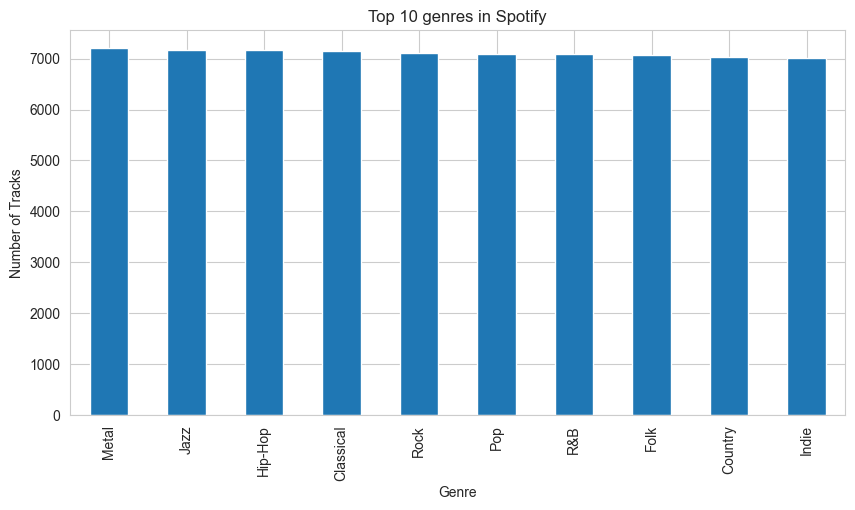

In [15]:
#which genres are the most common
plt.figure(figsize=(10,5))
df['genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 genres in Spotify")
plt.xlabel("Genre")
plt.ylabel("Number of Tracks")
plt.show()

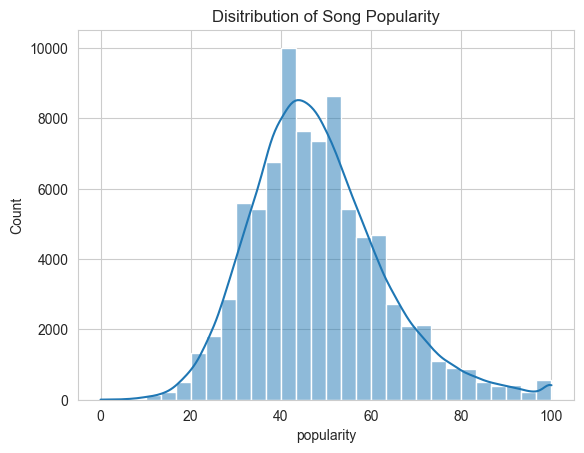

In [17]:
#Popularity distribution
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Disitribution of Song Popularity")
plt.show()

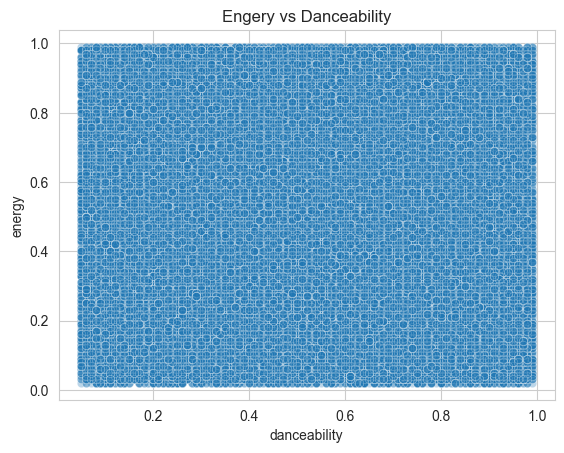

In [21]:
#Engergy vs Danceability
sns.scatterplot(
    data=df,
    x='danceability',
    y='energy',
    alpha=0.3,
)
plt.title("Engery vs Danceability")
plt.show()

In [27]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_date"] = df["release_date"].dt.year
df[["release_date", "release_year"]].head()

KeyError: "['release_year'] not in index"

In [26]:
#How has music popularity changed over time?
pop_year = df.groupby("release_year")["popularity"].mean()

plt.figure(figsize=(10,5))
pop_year.plot()
plt.title("Average Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.show()

KeyError: 'release_year'